# Analyzing Ford GoBike System Data

## by batoul alosaimi

## Preliminary Wrangling

> This document explores a dataset containing the trip data of the fordgo bike.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

/Users/batoul/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


>Load Ford Gobike Data



# Gathering data

In [2]:
# load in the dataset into a pandas dataframe, print statistics
df = pd.read_csv('/Users/batoul/Desktop/Project Template/fordgobike-tripdata.csv')

# Assessing Data

In [3]:
# high-level overview of data shape and composition
print(df.shape)
print(df.dtypes)
print(df.head(10))

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:2

In [4]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

# Cleaning Data


### Define


> Change data types, including times to datetimes, member_gender to categories and add age.

### Code

In [7]:
#changing data type of start_time to datetime.
df.start_time = pd.to_datetime(df.start_time)

In [8]:
#changing data type of end_time to datetime.
df.end_time = pd.to_datetime(df.end_time)

In [9]:
#change gender to category type
df.member_gender = df.member_gender.astype('category')

In [10]:
#Create column for user's age
df['Age']=2020 - df['member_birth_year']

### Test

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  float64       
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183215 non-null  float64       
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

### Define


>Using only appropriate age ranges.

### code


In [12]:
df['Age'].max()

142.0

In [13]:
df['Age'].min()

19.0

In [14]:
df_age_abnormal = df[df['Age'] > 80]
df_age_abnormal

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,Age
1285,148,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900.0,Male,Yes,120.0
5197,217,2019-02-28 13:51:46.238,2019-02-28 13:55:24.127,70.0,Central Ave at Fell St,37.773311,-122.444293,71.0,Broderick St at Oak St,37.773063,-122.439078,5801,Subscriber,1931.0,Male,No,89.0
5266,384,2019-02-28 13:35:05.428,2019-02-28 13:41:30.223,84.0,Duboce Park,37.769201,-122.433812,71.0,Broderick St at Oak St,37.773063,-122.439078,6608,Subscriber,1931.0,Male,No,89.0
5447,147,2019-02-28 13:08:56.935,2019-02-28 13:11:24.062,84.0,Duboce Park,37.769201,-122.433812,72.0,Page St at Scott St,37.772406,-122.435650,5018,Subscriber,1931.0,Male,No,89.0
10827,1315,2019-02-27 19:21:34.436,2019-02-27 19:43:30.008,343.0,Bryant St at 2nd St,37.783172,-122.393572,375.0,Grove St at Masonic Ave,37.774836,-122.446546,6249,Subscriber,1900.0,Male,No,120.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177885,517,2019-02-01 18:38:40.471,2019-02-01 18:47:18.392,25.0,Howard St at 2nd St,37.787522,-122.397405,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,2175,Subscriber,1902.0,Female,No,118.0
177955,377,2019-02-01 18:23:33.411,2019-02-01 18:29:50.795,26.0,1st St at Folsom St,37.787290,-122.394380,321.0,5th St at Folsom,37.780146,-122.403071,5444,Subscriber,1933.0,Female,Yes,87.0
179280,355,2019-02-01 14:32:42.247,2019-02-01 14:38:37.896,134.0,Valencia St at 24th St,37.752428,-122.420628,131.0,22nd St at Dolores St,37.755000,-122.425728,1815,Subscriber,1938.0,Male,No,82.0
182830,428,2019-02-01 07:45:05.934,2019-02-01 07:52:14.922,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,5031,Subscriber,1901.0,Male,No,119.0


In [15]:
# drop df_age_abnormal
df = df.drop(df_age_abnormal.index, axis=0)

### Test

In [17]:
df.shape

(183209, 17)

### What is the structure of your dataset?

> The dataset includes 183412 fordgobike trips with 17 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip,Age).


### What is/are the main feature(s) of interest in your dataset?

> I'm interested in What is the average duration of trips and does the age and gender has an impact on the duration of the trip?



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Trip Duration (seconds),member_gender and member_birth_year(age) .

# Univariate Exploration

> In this section, investigate distributions of individual variables.

Text(0, 0.5, 'Frequency')

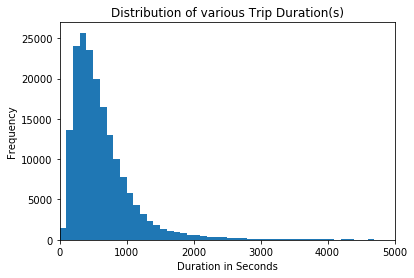

In [18]:
# Here we plot the distribution of trip durations in second.
bins = np.arange(0, df['duration_sec'].max() + 100 , 100)
plt.hist(data = df , x = 'duration_sec' , bins = bins)
plt.xlim(0,5000)
plt.title('Distribution of various Trip Duration(s)')
plt.xlabel('Duration in Seconds')
plt.ylabel('Frequency')

>We note that measuring the duration of the trip in seconds, so we will make some changes and convert the "duration -second" to "duration-minutes"

In [19]:
#convert the "duration -second" to "duration-minutes"
df['duration_min'] = df['duration_sec'] / 60
df.drop('duration_sec' , axis = 1 , inplace = True)

Text(0, 0.5, 'Frequency')

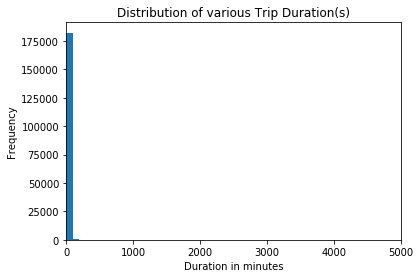

In [20]:
# Here we plot the distribution of trip durations minutes.

bins = np.arange(0, df['duration_min'].max() + 100 , 100)
plt.hist(data = df , x = 'duration_min' , bins = bins)
plt.xlim(0,5000)
plt.title('Distribution of various Trip Duration(s)')
plt.xlabel('Duration in minutes')
plt.ylabel('Frequency')

>There is a long tail in the distribution so lets put it on log scale

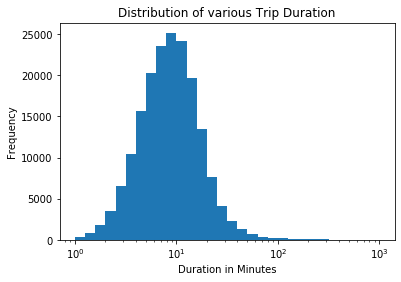

In [21]:
# Here we plot the distribution of trip durations log.

bins = 10**np.arange(0 , 3+0.1 , 0.1)
ticks =  [ 0.1 , 0.3 , 1 , 3, 10, 30, 100, 300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df , x = 'duration_min' , bins = bins);
plt.xticks(ticks,labels);
plt.title('Distribution of various Trip Duration')
plt.xlabel('Duration in Minutes');
plt.ylabel('Frequency')
plt.xscale('log');

>As we can easily understand from the above plot, most people prefer to use bikes for short-term trips (around 10 mins).

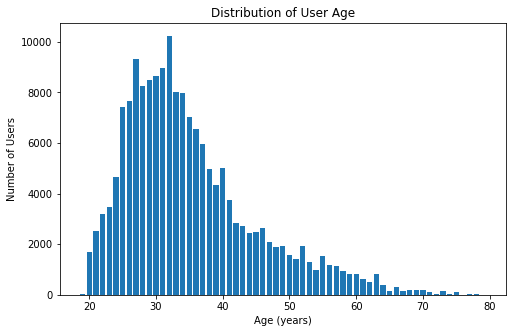

In [22]:
# plotting genders on bar.
plt.figure(figsize=[8,5])
plt.bar(x = df.Age.value_counts().keys(), height = df.Age.value_counts() )
plt.title('Distribution of User Age')
plt.xlabel('Age (years)')
plt.ylabel('Number of Users')
plt.show()

>We note that most of the ages are 33 years old.

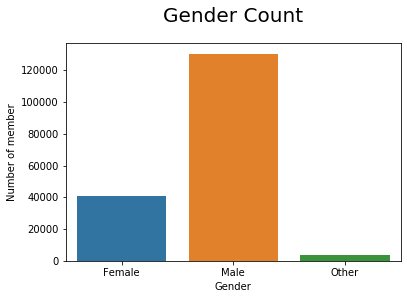

In [23]:
# Here we plot the gender type count.
sb.countplot(data = df, x = 'member_gender')
plt.title("Gender Count", fontsize=20, y=1.07)
plt.xlabel('Gender')
plt.ylabel('Number of member');

>We notice that most of the members are male.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> This dataset required some conversions in order to match my goals. I converted duration -second" to "duration-minutes" and member_gender to categories. also create column for users age .

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Obviously, some years of birth were wrong, as it was a maximum of 142 years old, including me removing some ages over 80.

# Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. 

##### looked at correlations between Duration and Age.



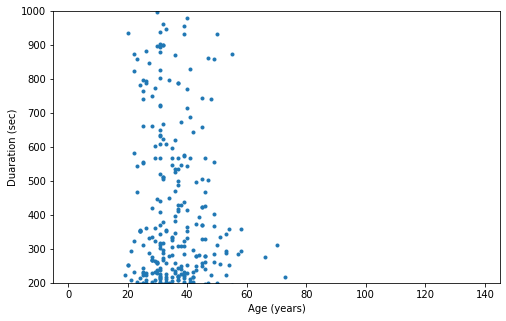

In [46]:
plt.figure(figsize=[8,5])
plt.scatter( df['Age'], df['duration_min'], alpha =1, marker = '.' )
plt.axis([-5, 145, 200, 1000])
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)')
plt.show()

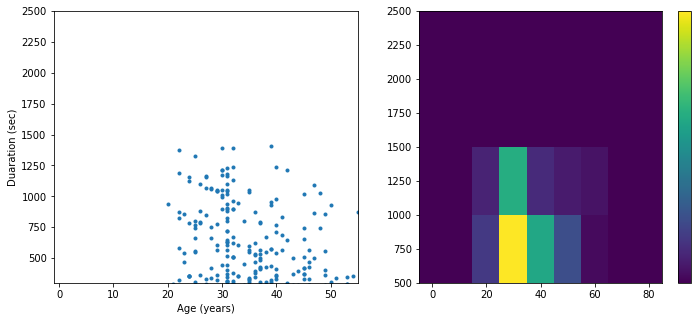

In [47]:
plt.figure(figsize=[12,5])

plt.subplot(1, 2, 1)
plt.scatter(df['Age'], df['duration_min'], alpha = 1, marker = '.' )
plt.axis([-1, 55, 300, 2500])
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)')

plt.subplot(1, 2, 2)
bins_y = np.arange(500, 2500+1, 500)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d(df['Age'], df['duration_min'],
           bins = [bins_x, bins_y])
plt.colorbar(ticks=[10000, 20000, 30000, 40000]);
plt.show()

> The duration of the trip depends on the age of the member, and the duration of the trip is longer than the older ages when the age is between 20 and 40.



##### looked at correlations between Duration and gender type.


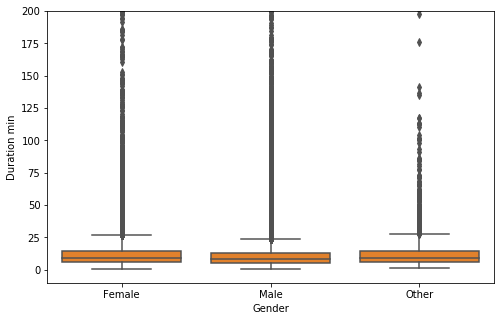

In [48]:
plt.figure(figsize = [8, 5])
base_color = sb.color_palette()[1]
sb.boxplot(data = df, x = 'member_gender', y = 'duration_min', color = base_color)
plt.ylim([-10, 200])
plt.xlabel('Gender')
plt.ylabel('Duration min')
plt.show()

>I will further explore the dataset by the trip duration of age and gender type.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> I did not expect, the duration of the flight depends greatly on the age of the member, and I have found a great dependency between them.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I expected categorical variables such as gender values with higher value to have higher trip duration, but the value of male members is very high, but the percentage of female members to take longer trips is higher.

## Multivariate Exploration

>I will analyze The relationship between trip duration and age is the key thing I want to explore in this project.



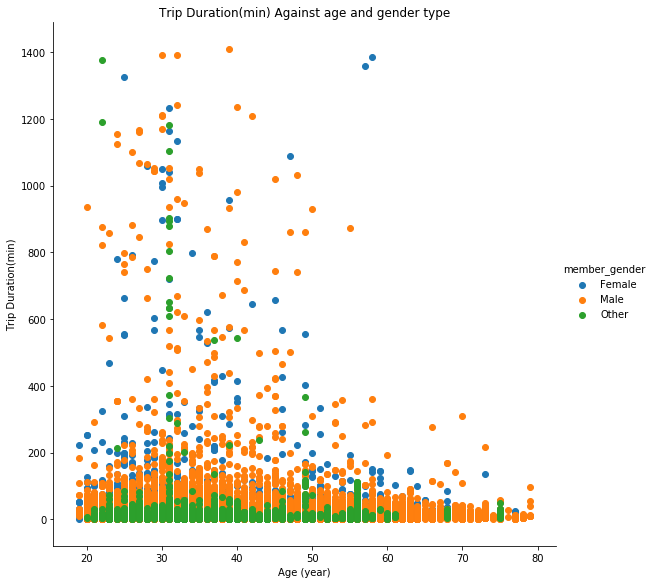

In [49]:
g = sb.FacetGrid(data =  df, hue = 'member_gender', height = 8)
g.map(plt.scatter, 'age','duration_min', alpha = 1)
g.add_legend()
plt.title('Trip Duration(min) Against age and gender type')
plt.xlabel('Age (year)')
plt.ylabel('Trip Duration(min)');

>The plot is can not read, so I will split genders.


/Users/batoul/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


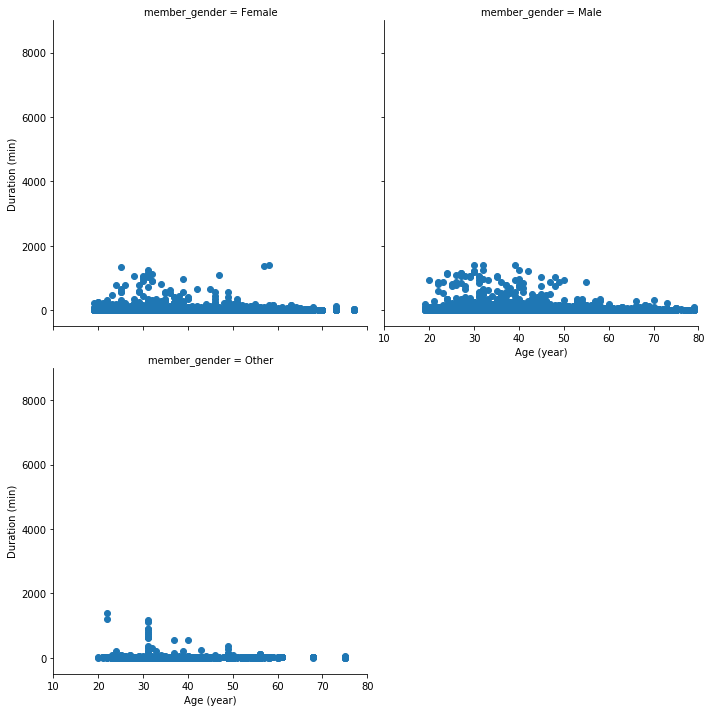

In [50]:
#Trip Duration, Gender, and Age
gender= sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
gender.map(plt.scatter, 'age', 'duration_min', alpha=1)
gender.set_xlabels('Age (year)')
gender.set_ylabels('Duration (min)')

plt.show()

>Violinplot duration_min distribution per user type and gender to comparing.


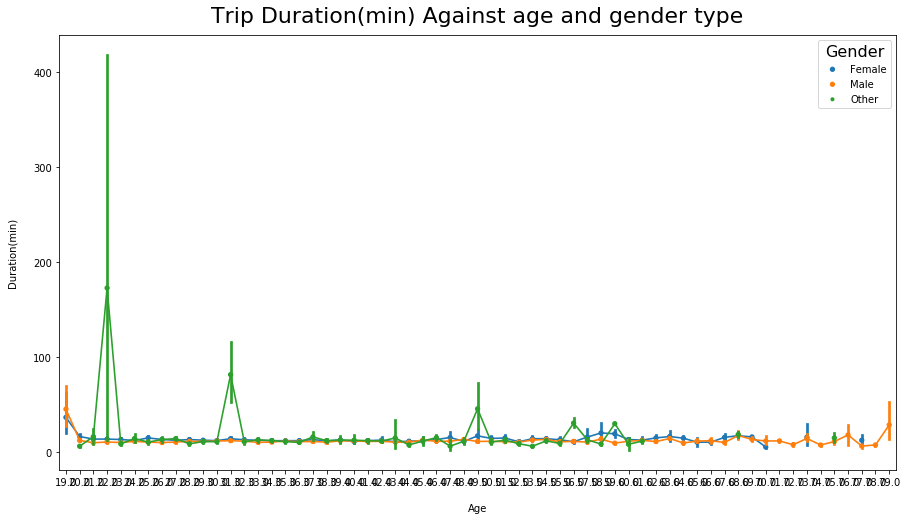

In [40]:
plt.figure(figsize=(15,8))
ax = sb.pointplot(x='Age', y='duration_min', hue='member_gender', scale=.6, data=df)
plt.title('Trip Duration(min) Against age and gender type', fontsize=22, y=1.015)
plt.xlabel('Age', labelpad=16)
plt.ylabel('Duration(min)', labelpad=16)
leg = ax.legend()
leg.set_title('Gender',prop={'size':16})
ax = plt.gca();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Here we observed that though the number of higher duration trip is higher for male but percentage is higher for women and other.

### Were there any interesting or surprising interactions between features?

> It was interesting to note that "other gender"group had the most outliers in the data, as well as ages over 50 years.


>At the end of your report, make sure that you export the notebook as an html file from the File > Download as... > HTML menu. Make sure you keep track of where the exported file goes, so you can put it in the same folder as this notebook for project submission. Also, make sure you remove all of the quote-formatted guide notes like this one before you finish your report!

